University of Zagreb<br/>
Faculty of Electrical Engineering and Computing<br/>
Department of Electronic Systems and Information Processing

Academic year 2021/2022

## **7th laboratory exercise: Image segmentation**

*Digital Image Processing and Analysis* (183463)

Date: 2022-03-10

Please send any feedback (corrections, comments, suggestions etc.) regarding this document to branimir.filipovic@fer.hr.

© University of Zagreb Faculty of Electrical Engineering and Computing, 2021.

Permission is granted to make and distribute copies of this instructions provided the copyright notice and this permission notice are preserved on all copies.

# Introduction

Instructions for laboratory exercises for the course *Digital Image Processing and Analysis* are prepared in a form of a <a href="https://jupyter.org/">Jupyter</a> notebooks.

All problems in prepared notebook are intended to be completed in Python using <a href="https://colab.research.google.com">Google Colaboratory</a> platform (Colab for short).

## How to Submit Your Laboratory Report

Simply write-in your code to all empty code cells and write in your answers to the text cells with questions.

Empty code cells contain the placeholder text `# Write-in your solution` while text cells where you have to write-in someting contain a bold uppercase text **WRITE YOUR ANSWER HERE**.

Once you have completed all problems save this notebook locally in a file named DIPA_LAB_X_NAME_SURNAME.ipynb,
where X is the exercise number, and submit it via Moodle under the appropriate upload section.

Your submissions will be first automatically re-evaluated which corresponds to selecting the *Runtime/Restart and run all* command in Colab. Therefore, it is strongly suggested that you run this command yourself before submitting your notebook. Another thing to do before submission is to clear all the cell outputs by selecting *Edit/Clear all outputs*. This will reduce the size of .ipynb files for upload.

## Student Information

Before proceeding double click on this text and then fill in your name:

Name: Enio Krizman

Student ID number (JMBAG): 0069083848

## Suggested Reading

### General Reading

If you are not familiar with Python then start with a Python tutorial such as e.g. an official one available at <a href="https://docs.python.org/3/tutorial/">https://docs.python.org/3/tutorial/</a>.

Jupyter notebooks are relying on <a href="https://ipython.org/">IPython</a>, which is an interactive Python interpreter. Jupyter notebooks may be run locally or they may be conveniently executed remotely in Google Colaboratory via web browser.

Readers familiar with Matlab who have only basic knowledge of Python are strongly encouraged to read the document <a href="https://numpy.org/doc/stable/user/numpy-for-matlab-users.html">NumPy for Matlab users</a> before attempting to solve this laboratory exercise in Colab.

### Image Processing in Python

Some general image processing functions are available as a part of [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html). This basic functionality is extended by the [`scikit-image`](https://scikit-image.org/). We will also use [OpenCV](https://opencv.org/).

#Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importing Required Functions

To simplify the code in Python in this notebook we may deliberately import functions from <a href="https://www.scipy.org/">SciPy</a>, <a href="https://numpy.org/">NumPy</a> and <a href="https://matplotlib.org/">Matplotlib</a> directly into the global namespace so e.g. we can write `fft` instead of `scipy.fft.fft`.

Please keep in mind that such an approach may be tolerated for the purpose of a short laboratory exercise where risks of collisions and side effects are minimal. It is best always avoided in production code.

If you prefer to use namespaces then feel free to change the import statements to retain strict package separation, e.g. `import numpy as np`.

In [ ]:
# Import packages
import cv2
import skimage.io

# To display images in browser
from google.colab.patches import cv2_imshow

# Import some functions to the global namespace for convenience
from scipy.ndimage import *
from scipy.fft import *
from scipy.signal import * 
from scipy.stats import *
!pip install scikit-image==0.18 #to install a specific skimage version that includes difference_of_gaussians
from skimage.filters import *
from skimage.feature import *

#from skimage.feature import greycomatrix, greycoprops
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import *

## Image loading

We will be using images from the [USC-SIPI database](http://sipi.usc.edu/database/) and additional images available on the [DIPA class webpage](https://www.fer.unizg.hr/en/course/dipaa_b/laboratory#%23!p_rep_139398!_-187329). To load any of these images, all we have to do is copy the URL of the image and write the following two lines of code.

In [ ]:
url = "http://sipi.usc.edu/database/preview/misc/5.3.02.png"
img = skimage.io.imread(url, plugin = 'pil')

## Image representations

[Grayscale](https://en.wikipedia.org/wiki/Grayscale) images are composed of pixels representing a grayscale value. In a computer a 2D grayscale image is represented as an $M \times N$ matrix of pixel values, which represent light intensity. 

It takes several such matrices for colored images - one for each color channel. There are several color models used for color image representation. For instance, an [RGB](https://en.wikipedia.org/wiki/RGB_color_model) image has three channels (for red, green and blue color) so an $M \times N \times 3$ matrix is used.   Color images can be converted to grayscale images, usually by calculating a weighted sum of the channels. The [cv2.cvtColor()](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function is used to convert images from one color space to another.

These representations allow the use of common matrix operators for image processing and analysis. 

In [ ]:
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
img = skimage.io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # openCV uses BGR (blue, green, red) representation
cv2_imshow(img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

# 7.1 Amplitude segmentation

Amplitude segmentation is the simplest way to segment an image. It is useful (efficient) when amplitude (the intensity of the pixel) defines the scene regions precisely enough. To perform amplitude segmentation, we can use the first order histogram.

## 7.1.1 Manual determination of threshold
In this part of the exercise, we will determine the segmentation threshold based on the histogram. If there are several regions with the more-or-less uniform color within each of them, then we expect histogram to be bimodal or multimodal. The interpretation of the histogram depends on the histogram itself and/or knowledge of the image content (e.g. number of regions and similarity of their colors or intensities).

An example of such a histogram is given in the Fig. 7.1. In this histogram we see several groups, and we would choose a threshold value 130 for segmentation into two classes. An optimal choice of the threshold corresponds to
the minimum value between two (local) maxima. If the histogram is multimodal and we want to segment the image into $N$ classes then we have to determine $N-1$ such thresholds.

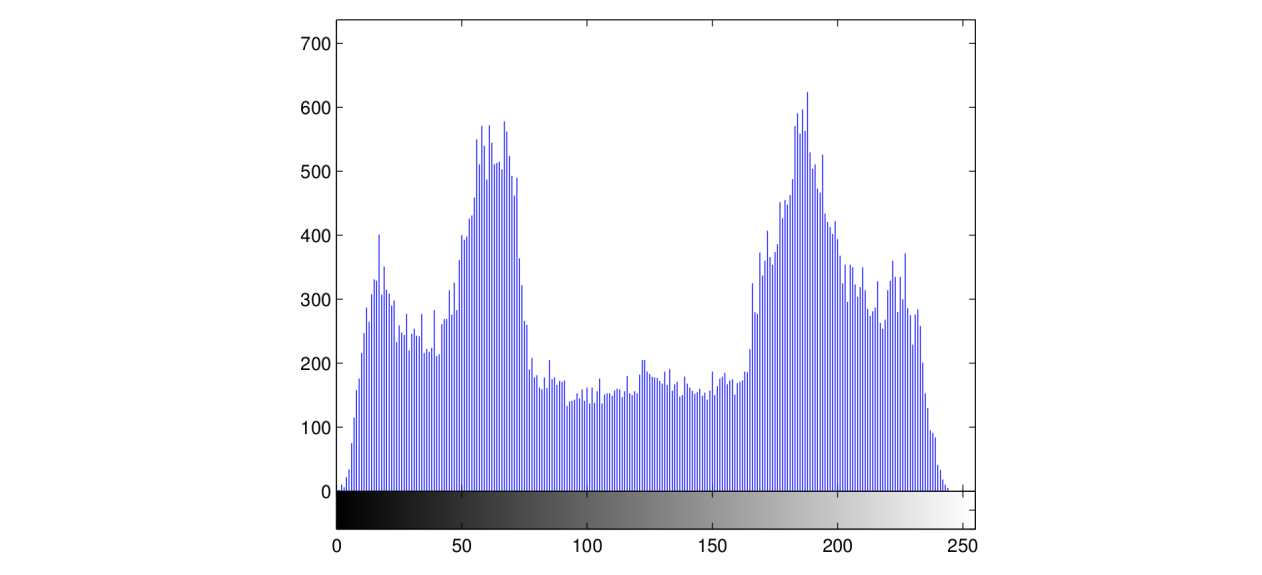

## <center>Figure 7.1: First-order histogram of an image. </center>



## Example

In [ ]:
img = cv2.imread('/content/drive/My Drive/Images/testpat1.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist, bin_edges = np.histogram(img.flatten(), bins = 256, range = (0, 256))     # calculate and show histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))
plt.stem(bin_edges[:-1], hist)
plt.show()

imgS1 = img > 130                                                               # if we interpret the histogram as bimodal, then we select 1 threshold
                                                                                # this results in a boolean array with 'true' representing '1' and 'false' representing '0'
plt.imshow(imgS1, cmap='gray')                                                  # meaning we got a binary image
plt.show()

### **7.1.2 Problems**



2. Read the image blood1.tif, showing blood cells. We want to segment the image so that cells are represented with an annulus (two concentric circles) with as little noise as possible. In the segmented image, blood cells will have a cavity in the middle. Display the histogram, determine an optimal threshold $t$, and display the segmented image. 


In [ ]:
# Write-in your solution
img = cv2.imread('/content/drive/My Drive/Images/blood1.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist, bin_edges = np.histogram(img.flatten(), bins = 256, range = (0, 256))     # calculate and show histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))
plt.stem(bin_edges[:-1], hist)
plt.show()

img_new = img > 120

plt.imshow(img_new, cmap= "gray")
plt.show()

3. For the same image display the results if you select a threshold $t+0.2$ or $t−0.2$ instead of threshold $t$ selected before. Describe what happened.


In [ ]:
# Write-in your solution
img = cv2.imread('/content/drive/My Drive/Images/blood1.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist, bin_edges = np.histogram(img.flatten(), bins = 256, range = (0, 256))     # calculate and show histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))
plt.stem(bin_edges[:-1], hist)
plt.show()

img_new1 = img > 120.2
img_new2= img > 119.8

plt.imshow(img_new1, cmap= "gray")
plt.show()
plt.imshow(img_new2, cmap= "gray")
plt.show()

Ne postoji velika razlika jer su vrijednosti za 0.2 i dalje jako blizu minimumu.



# 7.2 Automatic determination of the threshold
In this part of the exercise, we will demonstrate the success of specific  algorithms in automatic determination of the threshold. `scikit-image` has [several thresholding functions](https://scikit-image.org/docs/dev/api/skimage.filters.html):
- `skimage.filters.threshold_isodata`
- `skimage.filters.threshold_li`
- `skimage.filters.threshold_mean`
- `skimage.filters.threshold_minimum`
- `skimage.filters.threshold_multiotsu`
- `skimage.filters.threshold_niblack`
- `skimage.filters.threshold_otsu`
- `skimage.filters.threshold_sauvola`
- `skimage.filters.threshold_triangle`
- `skimage.filters.threshold_yen`.

Thresholding algorithms implemented in scikit-image can be separated in two categories:

- Histogram-based. The histogram of the pixels’ intensity is used and certain assumptions are made on the properties of this histogram (e.g. bimodal).

- Local. To process a pixel, only the neighboring pixels are used. These algorithms often require more computation time but perform better in case of more complex images.

If you are not familiar with the details of the different algorithms and the underlying assumptions, it is often difficult to know which algorithm will give the best results. Therefore, Scikit-image includes the function `skimage.filters.try_all_threshold` to evaluate thresholding algorithms provided by the library. At a glance, you can select the best algorithm for you data.

\\
**Note:** `skimage.filters.threshold_multiotsu` is used to segment into more than just two regions.




## Example

In [ ]:
img = cv2.imread('/content/drive/My Drive/Images/moon.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#the minimum algorithm takes a histogram of the image and smooths it repeatedly until there are only two peaks in the histogram and finds a minimum value between the two maxima
thresh_min = threshold_minimum(img)                                             # finding the threshold
print(thresh_min)
binary_min = img > thresh_min                                                   # applying the threshold

plt.imshow(binary_min, cmap='gray')
plt.show()

## Example

In [ ]:
img = cv2.imread('/content/drive/My Drive/Images/moon.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#the multiotsu algorithm calculates several thresholds, determined by the number of desired classes
threshs_mo = threshold_multiotsu(img, classes=5)                                # finding the threshold
print(threshs_mo)
regions = np.digitize(img, bins=threshs_mo)                                     # applying the threshold

plt.imshow(regions, cmap='gray')
plt.show()

### **7.2.1 Problems**
1. Read the image blood1.tif. Try the segmentation using thresholds obtained using the following functions:
- `skimage.filters.threshold_mean`
- `skimage.filters.threshold_minimum`
- `skimage.filters.threshold_otsu`
- `skimage.filters.threshold_multiotsu` (3 and 4 classes). 

Compare the threshold values obtained with the manual approach. How do the listed functions determine the threshold(s)?

In [ ]:
# Write-in your solution
img = cv2.imread('/content/drive/My Drive/Images/blood1.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#treshold min
min = img > threshold_minimum(img)
plt.imshow(min, cmap='gray')
plt.show()

#treshold mean
mean = img > threshold_mean(img)
plt.imshow(mean, cmap='gray')
plt.show()

#treshold otsu
otsu = img > threshold_otsu(img)
plt.imshow(otsu, cmap='gray')
plt.show()

#treshold multiotsu 3
multiotsu = threshold_multiotsu(img, classes=3)
regions= np.digitize(img, bins=multiotsu)
plt.imshow(regions, cmap='gray')
plt.show()

#treshold multiotsu 4
multiotsu = threshold_multiotsu(img, classes=4)
regions= np.digitize(img, bins=multiotsu)
plt.imshow(regions, cmap='gray')
plt.show()

Mean, minimum i otsu daju slične rezultate dok funkcija multiotsu računa nekiliko pragova na osnovu željenog broja razreda pa zato daje i najbolje rezultate.

# 7.3. Local 

If the image background is relatively uniform, then you can use a global threshold value as presented above. However, if there is large variation in the background intensity, adaptive thresholding (a.k.a. local or dynamic thresholding) may produce better results. Note that local is much slower than global thresholding.

Here, we binarize an image using the [skimage.filters.threshold_local](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_local) function, which calculates thresholds in regions with a characteristic size block_size surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted mean of the local neighborhood minus an offset value.

## Example

In [ ]:
img = cv2.imread('/content/drive/My Drive/Images/slika4.tiff')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

global_threshold = threshold_otsu(img)
binary_global = img > global_threshold

block_size = 101
local_threshold = threshold_local(img, block_size, offset=15)
binary_local = img > local_threshold


plt.imshow(binary_global, cmap='gray')
plt.show()

plt.imshow(binary_local, cmap='gray')
plt.show()

### **7.3.1 Problems**
1. Try using local thresholding on the image 'moon.tif'. What do you notice?

In [ ]:
# Write-in your solution
img = cv2.imread('/content/drive/My Drive/Images/moon.tif')
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

global_threshold = threshold_otsu(img)
binary_global = img > global_threshold

block_size = 101
local_threshold = threshold_local(img, block_size, offset=15)
binary_local = img > local_threshold

plt.imshow(binary_global, cmap='gray')
plt.show()

plt.imshow(binary_local, cmap='gray')
plt.show()

Lokalni tresholding daje bolje rezulate od globalnog jer se računa po dijelovima pa je vidljiv veći broj detalja na slici(npr. površina mjeseca)

# 7.4 Extraction of edges
We want to get a binary image (same dimensions as the input image) that contains only the detected edges from the input image. First step is edge detection, for which we can use first or second order derivative estimators. 
Methods based on the first order derivative calculate the derivative estimation for each pixel. Amplitude segmentation is then applied to this image. 
Methods based on the second order derivative detect zero-crossing of the intensity values. In this case, the threshold corresponds to the steepness of the edge.

## Example:

In [ ]:
img = cv2.imread('/content/drive/My Drive/Images/saturn.tif')
saturn = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

grad = sobel(saturn)                                                            # apply the Sobel operator

print(np.max(grad), np.min(grad))
grad = grad * 255 / np.max(grad)                                                # normalize
print(np.max(grad), np.min(grad))

hist, bin_edges = np.histogram(grad.flatten(), bins = 256, range = (0, 256))
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))
plt.ylim((0, 1500))
plt.stem(bin_edges[:-1], hist)
plt.show()

thresh = threshold_otsu(grad)
print(thresh)
grad = grad > thresh                                                            # segment to make a binary image

plt.figure(figsize=(8,8))
plt.imshow(grad, cmap='gray')                                                   # visualizing the edges

### **7.4.1 Problems**
1. Read the image 4.2.07.tiff from the USC-SIPI database. Extract the edges using sobel operator and different thresholding methods. Which method gives the best edge detection? 


In [ ]:
# Write-in your solution
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
img = skimage.io.imread(url, plugin = 'pil')                                 # read the grayscale image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grad = sobel(img)  


print(np.max(grad), np.min(grad))
grad = grad * 255 / np.max(grad)                                                # normalize
print(np.max(grad), np.min(grad))

hist, bin_edges = np.histogram(grad.flatten(), bins = 256, range = (0, 256))
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))
plt.ylim((0, 1500))
plt.stem(bin_edges[:-1], hist)
plt.show()

thresh_otsu = threshold_otsu(grad)
thresh_mean = threshold_mean(grad)
thresh_min = threshold_minimum(grad)
print(thresh)
grad1 = grad > thresh_otsu      
grad2 = grad > thresh_mean 
grad3 = grad > thresh_min                                                        # segment to make a binary image

plt.imshow(grad1, cmap='gray')  
plt.show() 
plt.imshow(grad2, cmap='gray')  
plt.show() 
plt.imshow(grad3, cmap='gray')  
plt.show() 

Minimum funkcija nije dobra za ekstrakciiju rubova, otsu funkcija prikazuje vjerno oštre rubove između objekata i pozadina dok srednja vrijednost detaljnije prikazuje oštre i manje oštre rubove.

2. Extract the edges of the image 4.2.07.tiff, using the **a) Sobel, b) DoG - [skimage.filters.difference_of_gaussians](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.difference_of_gaussians), and c) Canny operator - [skimage.feature.canny](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny), with the thresholding method selected in the previous task. Which operator works the best?

In [ ]:
# Write-in your solution
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
img = skimage.io.imread(url, plugin = 'pil')                                 # read the grayscale image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#sobel
grad = sobel(img)                                                            # apply the Sobel operator

print(np.max(grad), np.min(grad))
grad = grad * 255 / np.max(grad)                                                # normalize
print(np.max(grad), np.min(grad))

hist, bin_edges = np.histogram(grad.flatten(), bins = 256, range = (0, 256))

thresh = threshold_otsu(grad)
print(thresh)
grad = grad > thresh                                                            # segment to make a binary image

plt.imshow(grad, cmap='gray')     
plt.show()

#canny
grad = canny(img)                                                            # apply the Sobel operator

print(np.max(grad), np.min(grad))
grad = grad * 255 / np.max(grad)                                                # normalize
print(np.max(grad), np.min(grad))

hist, bin_edges = np.histogram(grad.flatten(), bins = 256, range = (0, 256))

thresh = threshold_otsu(grad)
print(thresh)
grad = grad > thresh                                                            # segment to make a binary image

plt.imshow(grad, cmap='gray')   
plt.show()

#gaussian
grad = difference_of_gaussians(img, 0.9 ,15) 
print(np.max(grad), np.min(grad))
grad = grad * 255 / np.max(grad)                                                # normalize
print(np.max(grad), np.min(grad))

hist, bin_edges = np.histogram(grad.flatten(), bins = 256, range = (0, 256))

thresh = threshold_otsu(grad)
print(thresh)
grad = grad > thresh                                                            # segment to make a binary image

plt.imshow(grad, cmap='gray') 
plt.show()

Canny operator daje najbolje rezultate jeri koristi višestupanjski algoritam za otkrivanje širokog raspona rubova na slikama. Glavne prednosti Sobel operatora su da je jednostavan i vremenski učinkovitiji. Međutim, rubovi su grubi. S druge strane, Canny tehnika daje glađe rubove zbog implementacije supresije bez maksimuma i praga.

3. Add the noise to the original image and repeat the edge detection with
the 3 operators. How does the noise affect the edge detection for these cases?

In [ ]:
# Write-in your solution
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
img = skimage.io.imread(url, plugin = 'pil')                                 # read the grayscale image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#dodavanje šuma u sliku
img = skimage.img_as_ubyte(skimage.util.random_noise(img, mode = 'gaussian', clip = True,var = 0.2))

#sobel
grad = sobel(img)                                                            # apply the Sobel operator

print(np.max(grad), np.min(grad))
grad = grad * 255 / np.max(grad)                                                # normalize
print(np.max(grad), np.min(grad))

hist, bin_edges = np.histogram(grad.flatten(), bins = 256, range = (0, 256))

thresh = threshold_otsu(grad)
print(thresh)
grad = grad > thresh                                                            # segment to make a binary image

plt.imshow(grad, cmap='gray')     
plt.show()

#canny
grad = canny(img)                                                            # apply the Sobel operator

print(np.max(grad), np.min(grad))
grad = grad * 255 / np.max(grad)                                                # normalize
print(np.max(grad), np.min(grad))

hist, bin_edges = np.histogram(grad.flatten(), bins = 256, range = (0, 256))

thresh = threshold_otsu(grad)
print(thresh)
grad = grad > thresh                                                            # segment to make a binary image

plt.imshow(grad, cmap='gray')   
plt.show()

#gaussian
grad = difference_of_gaussians(img, 0.9 ,15) 
print(np.max(grad), np.min(grad))
grad = grad * 255 / np.max(grad)                                                # normalize
print(np.max(grad), np.min(grad))

hist, bin_edges = np.histogram(grad.flatten(), bins = 256, range = (0, 256))

thresh = threshold_otsu(grad)
print(thresh)
grad = grad > thresh                                                            # segment to make a binary image

plt.imshow(grad, cmap='gray') 
plt.show()

Najbolje rezultate daje difference_of_gaussians jer smo dodali gaussov šum za čije je otklanjanje ova funkcija i najpogodnija.

# 7.5 Texture segmentation
We will segment the textures based on selected features. First, for each pixel in the image, we will calculate the selected feature on the defined neighboorhod of the pixel. Texture features are calculated from 2nd order histograms. The image containing the feature values is the image we will segment.

The 2nd order histogram can be calculated using [skimage.feature.greycomatrix](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.graycomatrix). Its features can be calculated using [skimage.feature.greycoprops](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.graycoprops).

# Example

In [ ]:
img = cv2.imread('/content/drive/My Drive/Images/saturn.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

patch_size=17
v_shifts = img.shape[0] // patch_size
h_shifts = img.shape[1] // patch_size
feat_img = np.empty(shape=(v_shifts, h_shifts), dtype=float)                    #empty result matrix, will be filled in the 'for' loops

for i in range(v_shifts):
    for j in range(h_shifts):
        patch = img[i*patch_size:i*patch_size + patch_size, j*patch_size:j*patch_size + patch_size]

        hist_2nd = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                                symmetric=True, normed=True)                    # horizontal offset of 5, defined by distance and angle
        
        #print(patch.shape, hist_2nd.shape, "- the dimensions are: levels x levels x number of distances x number of angles.")

        dissi = greycoprops(hist_2nd, 'dissimilarity')[0,0]
        feat_img[i,j] = dissi                                                   # filling the result matrix 

plt.imshow(feat_img, cmap='gray')
plt.show()

feat_img_segm1 = feat_img > threshold_niblack(feat_img)                         # segmentation
plt.imshow(feat_img_segm1, cmap='gray')
plt.show()
feat_img_segm2 = feat_img > 3                         
plt.imshow(feat_img_segm2, cmap='gray')


### **7.5.1 Problems**

1. Read the image texture.png. Display the image. How many textures are there in the image? Describe them.


In [ ]:
# Write-in your solution
img = cv2.imread('/content/drive/My Drive/Images/teksture.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

Slika se sastoji od 5 tekstura od različitih materijala- drvo,svila, tkanina...

2. Select several features and calculate them on the blocks (patches) of size 12 × 12. Display the calculated features and estimate which ones can be used to segment given structure. For the selected images (features) choose a good thresholding method and comment on the results.

In [ ]:
img = cv2.imread('/content/drive/My Drive/Images/teksture.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

patch_size=12
v_shifts = img.shape[0] // patch_size
h_shifts = img.shape[1] // patch_size
feat_img = np.empty(shape=(v_shifts, h_shifts), dtype=float)                    #empty result matrix, will be filled in the 'for' loops

for i in range(v_shifts):
    for j in range(h_shifts):
        patch = img[i*patch_size:i*patch_size + patch_size, j*patch_size:j*patch_size + patch_size]

        hist_2nd = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                                symmetric=True, normed=True)                    # horizontal offset of 5, defined by distance and angle
        
        #print(patch.shape, hist_2nd.shape, "- the dimensions are: levels x levels x number of distances x number of angles.")

        dissi = greycoprops(hist_2nd, 'dissimilarity')[0,0]
        feat_img[i,j] = dissi                                                   # filling the result matrix 

plt.imshow(feat_img, cmap='gray')
plt.show()

feat_img_segm1 = feat_img > threshold_mean(feat_img)                         # segmentation
plt.imshow(feat_img_segm1, cmap='gray')
plt.show()
feat_img_segm2 = feat_img > 3                         
plt.imshow(feat_img_segm2, cmap='gray')

**WRITE YOUR ANSWERS HERE**

3. Calculate the energy without the DC component (subtract the mean from the image) feature on the texture.tif image, on blocks of size 12×12. Is this feature good for segmentation of the textures on this image? Segment the energy image and comment on the results.

In [ ]:
img = cv2.imread('/content/drive/My Drive/Images/teksture.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

patch_size=12
v_shifts = img.shape[0] // patch_size
h_shifts = img.shape[1] // patch_size
feat_img = np.empty(shape=(v_shifts, h_shifts), dtype=float)                    #empty result matrix, will be filled in the 'for' loops

for i in range(v_shifts):
    for j in range(h_shifts):
        patch = img[i*patch_size:i*patch_size + patch_size, j*patch_size:j*patch_size + patch_size]

        hist_2nd = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                                symmetric=True, normed=True)                    # horizontal offset of 5, defined by distance and angle
        
        #print(patch.shape, hist_2nd.shape, "- the dimensions are: levels x levels x number of distances x number of angles.")

        dissi = greycoprops(hist_2nd, 'dissimilarity')[0,0]
        feat_img[i,j] = dissi                                                   # filling the result matrix 

plt.imshow(feat_img, cmap='gray')
plt.show()

feat_img_segm1 = feat_img > threshold_mean(feat_img)                         # segmentation
plt.imshow(feat_img_segm1, cmap='gray')
plt.show()
feat_img_segm2 = feat_img > 3                         
plt.imshow(feat_img_segm2, cmap='gray')

**WRITE YOUR ANSWERS HERE**